# An introduction to Reinforcement Learning
> "Demo and Discussion of RL & OpenAI gym"

In [1]:
#hide
%matplotlib inline
import PIL
import gym
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
import matplotlib.pyplot as plt
mpl.rc('animation', html='jshtml')
# Imports specifically so we can render outputs in Jupyter.
#from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display
import tensorflow as tf
import pandas as pd
from tensorflow import keras

## What is RL?

- In a nutshell, RL is the study of agents and how they learn by trial and error
- It formalizes the idea that rewarding or punishing an agent for its behavior makes it more likely to repeat or forego that behavior in the future

This is quite a broad setting, which can apply to a wide variety of tasks.  

<img src="my_icons/RL_applications.JPG" width=700 height=700 left   align="left"/>

1. The agent can be the program controlling a robot. In this case, the environment is the real world, the agent observes the environment through a set of sensors such as cameras and touch sensors, and its actions consist of sending signals to activate motors  
1. The agent can be the program controlling Ms. Pac-Man. In this case, the environment is a simulation of the Atari game
1. The agent can be the program playing a board game such as Go
1. The agent does not have to control a physically (or virtually) moving thing. A smart thermostat, getting positive rewards whenever it is close to the target temperature and saves energy, and negative rewards when humans need to tweak the temperature
1. The agent can observe stock market prices and decide how much to buy
or sell every second. Rewards are obviously the monetary gains and
losses

## RL framework

<img src="my_icons/RL_framework.JPG" width=700 height=700 left   align="left"/>

**Key Concepts and Terminology**:  

1. The main characters of RL are the agent and the environment:<br>
   - The agent is an entity which is of interest to us
   - The environment is the world that the agent lives in and interacts with. At every step of interaction, the agent sees a (possibly partial) observation of the state of the environment, and then decides on an action to take  
   - The environment changes when the agent acts on it, but may also change on its own  

2. Moreover:
   - The agent perceives a reward signal from the environment, a number that tells it how good or bad the current world state is  
   - The goal of the agent is to maximize its cumulative reward, called return. Reinforcement learning    methods are ways that the agent can learn behaviors to achieve its goal


> To talk more specifically what RL does, we need to introduce additional terminology. We need to talk about states and observations,
action spaces,
policies,
return,
and value functions.

### States and Observations<br>
- A state '**s**' is a complete description of the state of the world.
There is no information about the world which is hidden from the state.  
- An observation o is a partial description of a state, which may omit information. 
A lot of the times, observations and state are used interchangeably

- In deep RL, we almost always represent states and observations by a real-valued vector, matrix, or higher-order tensor
For instance, a visual observation could be represented by the RGB matrix of its pixel values;   
the state of a robot might be represented by its joint angles and velocities


### Action Spaces <br>
- Different environments allow different kinds of actions  
- The set of all valid actions in a given environment is often called the action space. Some environments, like Atari and Go, have discrete action spaces, where only a finite number of moves are available to the agent  
Other environments, like where the agent controls a robot in a physical world, have continuous action spaces

## Policies

- The algorithm a software agent uses to determine its actions is called its policy. It can be deterministic or stochastic denoted by $\Pi$
- Because the policy is essentially the agent’s brain, it’s not uncommon to substitute the word “policy” for “agent”, eg saying “The policy is trying to maximize reward.”
- In deep RL, we deal with parameterized policies i.e policies whose outputs are computable functions that depend on a set of parameters (eg the weights and biases of a neural network) which we can adjust to change the behavior via some optimization algorithm  

<img src="my_icons/RL_agent.JPG" width=800 height=800 left   align="left"/>

### Policy design<br>

- Techniques to design a policy:

      For example, consider a robotic vacuum cleaner whose reward is
      the amount of dust it picks up in 30 minutes. 
      Its policy could be to move forward with some probability p every second,
      or randomly rotate left or right with probability 1 – p. 
      The rotation angle would be a random angle between –r and +r.
      
      How would you train such a robot?
      There are just two policy parameters you can tweak: the probability p and the angle range r.

<img src="my_icons/RL_vaccum_robot.JPG" width=700 height=700 left   align="left"/>.<br>

Four points in policy space (left) and the agent’s corresponding behavior (right)

- One possible learning algorithm could be to try out many different values for these parameters, and pick the
combination that performs best (see above Figure).  
This is an example of ***policy search using a brute force approach***. When the policy space is too
large (which is generally the case), finding a good set of parameters  
this way is like searching for a needle in a gigantic haystack.
- Another way to explore the policy space is to use genetic algorithms. For example, you could randomly create a first generation of 100 policies and try them out,  
then “kill” the 80 worst policies and make the 20 survivors produce 4 offspring each.  
An offspring is a copy of its parent plus some random variation. The surviving policies plus their offspring together constitute the second generation.  
we can continue to iterate through generations this way until we find a good policy.
- Yet another approach is to use optimization techniques, by evaluating the
gradients of the rewards with regard to the policy parameters, then tweaking these parameters by following the gradients toward higher rewards. This approach, is called **policy gradients (PG)** .  

Going back to the vacuum cleaner robot, you could slightly increase p and evaluate whether doing so increases the amount of dust picked up by the robot in 30 minutes;  
if it does, then increase p some more, or else reduce p.

# OpenAI Gym

>OpenAI Gym is a toolkit that provides a wide variety of simulated
environments(Atari games, board games, 2D and 3D physical simulations etc.) so you can train agents, compare them, or develop new RL algorithms.<br>  
>One of the challenges of Reinforcement Learning is that in order to train an
agent, you first need to have a working environment.
If you want to program an agent that will learn to play an Atari game, you will need an Atari game
simulator. If you want to program a walking robot, then the environment is the
real world, and you can directly train your robot in that environment, but this has
its limits: if the robot falls off a cliff, you can’t just click Undo. 
You can’t speed up time either; 
And it’s generally too expensive to train 1,000 robots in parallel.   
In short, training is hard and slow in the real world, so you generally need a simulated environment.  

In [6]:
#hide
df = pd.DataFrame({"OpenAI_Environments": [i.id for i in list(gym.envs.registry.all())[:50]]}).sample(10)
(df.style
        .set_table_styles([{'selector': 'th', 'props': [('font-size', '20pt')]}])
        .set_properties(**{'font-size': '20pt'})
)

,OpenAI_Environments
3,ReversedAddition3-v0
31,Striker-v2
1,RepeatCopy-v0
47,FetchSlide-v1
6,CartPole-v0
11,Acrobot-v1
27,HotterColder-v0
48,FetchPickAndPlace-v1
40,Walker2d-v2
19,KellyCoinflipGeneralized-v0


## The Cart Pole/Inverted pendulum problem<br>

The Cart-Pole is a classic control problem. It is a very simple environment composed of a cart that can move left or right, and pole placed vertically on top of it.   
The agent must move the cart left or right to keep the pole upright.<br>  

> youtube: https://youtu.be/qMlcsc43-lg



<img src="my_icons/Cartpole.JPG" width=700 height=700 left   align="left"/>

Observations vary depending on the environment. In this case it is a 1D NumPy array composed of 4 floats:   
they represent the cart’s horizontal position (0.0 = center), its velocity (positive means right), the angle of the pole, and its angular velocity
(positive means clockwise) respectively.

In [2]:
env = gym.make("CartPole-v1")
env.seed(42)
obs = env.reset()
obs

array([-0.01258566, -0.00156614,  0.04207708, -0.00180545])

#hide  
An environment can be visualized by calling its render() method, and you can pick the rendering mode (the rendering options depend on the environment)
In this example we will set mode="rgb_array" to get an image of the environment as a NumPy array.

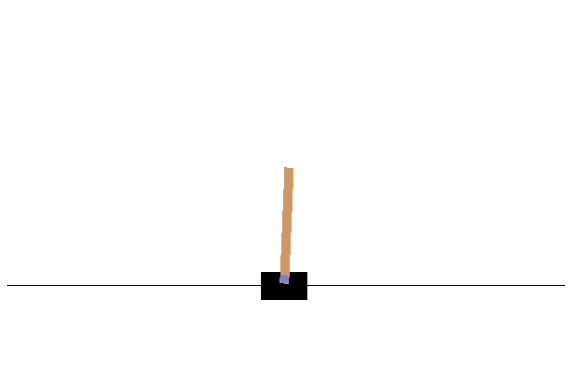

In [3]:
#hide-input
def plot_environment(env, figsize=(10,8)):
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    return img

plot_environment(env)
plt.show()

In [23]:
# actions possible
env.action_space

Discrete(2)

There are 2 possible actions, accelerate towards the left or towards the right denoted by integers 0 and 1 respectively.
Other environments may have additional discrete actions, or other kinds of actions (e.g., continuous).  
Since the pole is leaning toward the right (obs[2] > 0), let’s accelerate the cart toward the
right using the `step()` method.

In [4]:
action = 1 #accelerate right
obs, reward, done, info = env.step(action)
obs

array([-0.01261699,  0.19292789,  0.04204097, -0.28092127])

Notice that the cart is now moving toward the right (obs[1] > 0). The pole is still tilted toward the right (obs[2] > 0), but its angular velocity is now negative (obs[3] < 0), so it will likely be tilted toward the left after the next step

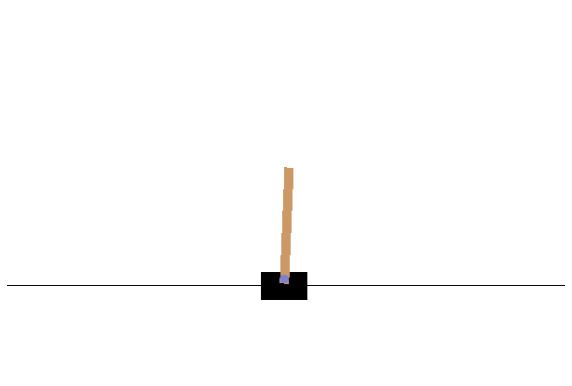

In [8]:
plot_environment(env)
plt.show()

- The environment also tells the agent how much reward it got during the last step. In this environment, you get a reward of 1.0 at every step, no matter what
you do, so the goal is to keep the episode running as long as possible
- The sequence of steps between the moment the environment is reset(initialised) until it is done is called an "episode".  
When the episode is over, the environment returns `done=True`  
This will happen when the pole tilts too much, or goes off the screen, or after 200 steps (in this last case,
you have won). After that, the environment must be reset before it can be used again by using `obs = env.reset()`
- Finally, info is an environment-specific dictionary that can provide some extra information that you may find useful for debugging or for training, for example in some games it may indicate how many lives the agent has

In [9]:
reward, done, info

(1.0, False, {})

> Now how can we make the poll remain upright? 

Let’s hardcode a simple policy that accelerates left when the pole is leaning
toward the left and accelerates right when the pole is leaning toward the right.  
We will run this policy to see the average rewards it gets over 500 episodes:

In [ ]:
env.seed(42)
def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

totals = []
for episode in range(500):
    episode_rewards = 0
    obs = env.reset()
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, done, info = env.step(action)
        print(step, action, reward, episode_rewards,'\n')
        episode_rewards += reward
        if done:
            break
    totals.append(episode_rewards)

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 0 1.0 46.0 

47 0 1.0 47.0 

48 0 1.0 48.0 

49 0 1.0 49.0 

50 1 1.0 50.0 

51 1 1.0 51.0 

52 1 1.0 52.0 

53 1 1.0 53.0 

54 1 1.0 54.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

40 1 1.0 40.0 

41 1 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 0 1.0 46.0 

47 0 1.0 47.0 

48 0 1.0 48.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

40 1 1.0 40.0 

41 1 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

48 1 1.0 48.0 

49 0 1.0 49.0 

50 0 1.0 50.0 

51 0 1.0 51.0 

52 0 1.0 52.0 

53 0 1.0 53.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 1

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 0 1.0 5.

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

48 1 1.0 48.0 

49 1 1.0 49.0 

50 1 1.0 50.0 

51 1 1.0 51.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

40 1 1.0 40.0 

41 1 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 1 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 1 1.0 40.0 

41 1 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

40 1 1.0 40.0 

41 1 1.0 41.0 

42 1 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 0 1.0 46.0 

47 0 1.0 47.0 

48 0 1.0 48.0 

49 0 1.0 49.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

48 1 1.0 48.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 



37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

48 1 1.0 48.0 

49 1 1.0 49.0 

50 1 1.0 50.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1

54 1 1.0 54.0 

55 1 1.0 55.0 

56 1 1.0 56.0 

57 1 1.0 57.0 

58 1 1.0 58.0 

59 1 1.0 59.0 

60 1 1.0 60.0 

61 1 1.0 61.0 

62 0 1.0 62.0 

63 0 1.0 63.0 

64 0 1.0 64.0 

65 0 1.0 65.0 

66 0 1.0 66.0 

67 0 1.0 67.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 0 1.0 46.0 

47 0 1.0 47.0 

48 0 1.0 48.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 0 1.0 46.0 

47 0 1.0 47.0 

48 1 1.0 48.0 

49 1 1.0 49.0 

50 1 1.0 50.0 

51 1 1.0 51.0 

52 1 1.0 52.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 0

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

40 1 1.0 40.0 

41 1 1.0 41.0 

42 1 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 0 1.0 46.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 0 1.0 46.0 

47 0 1.0 47.0 

48 0 1.0 48.0 

49 0 1.0 49.0 

50 0 1.0 50.0 

51 0 1.0 51.0 

52 0 1.0 52.0 

53 0 1.0 53.0 

54 0 1.0 54.0 

55 0 1.0 55.0 

56 0 1.0 56.0 

57 1 1.0 57.0 

58 1 1.0 58.0 

59 1 1.0 59.0 

60 1 1.0 60.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 


33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 1 1.0 28.0 

29 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.

27 0 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

48 1 1.0 48.0 

49 1 1.0 49.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

40 1 1.0 40.0 

41 1 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

48 0 1.0 48.0 

49 0 1.0 49.0 

50 0 1.0 50.0 

51 0 1.0 51.0 

52 0 1.0 52.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1


0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 1 1.0 40.0 

41 1 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 


11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 0 1.0 46.0 

47 1 1.0 47.0 

48 1 1.0 48.0 

49 1 1.0 49.0 

50 1 1.0 50.0 

51 1 1.0 51.0 

52 1 1.0 52.0 

53 1 1.0 53.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 0 1.0 46.0 

47 0 1.0 47.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0